In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# 6.1.4
# Create a set of random latitude and longitude combinations.
# generating 1500 lat/lngs using np.random between -90 and 90
# pairing them together with the zip() function
# zip() packs each pair of lats/lngs having the same index in their respecive arrays as a tuple
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# 6.1.5
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [5]:
#6.2.6 get the weather data
#enumerate, try and except loops
import requests
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
#enumerate is the same as a for loop, with slightly different syntax (for i, item in enumerate(list):)
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    # this is checking if the remainder of the index (i) devided by 50 is equal to 0, this will take 1-50 into one group, then 51-100 and so on
    # and if the index is greater than or equal to 50
    # if the statemnt is true, then the set_count and the record_count are incremented by 1
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    # creating the url endpoint for each city, but removing the spaces in the cities name
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | viedma
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | cockburn town
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | meulaboh
Processing Record 10 of Set 1 | chibombo
Processing Record 11 of Set 1 | severo-kurilsk
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | te anau
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | rawson
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | pecos
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | gorno-chuyskiy
City not found. Skipping...
Processing Record 20 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 21 of Set 1 | ponta do sol
Proce

Processing Record 35 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 36 of Set 4 | husavik
Processing Record 37 of Set 4 | manzhouli
Processing Record 38 of Set 4 | araouane
Processing Record 39 of Set 4 | san fernando
Processing Record 40 of Set 4 | marawi
Processing Record 41 of Set 4 | gornyy
Processing Record 42 of Set 4 | berezovyy
Processing Record 43 of Set 4 | lukovetskiy
Processing Record 44 of Set 4 | mar del plata
Processing Record 45 of Set 4 | alamosa
Processing Record 46 of Set 4 | kamenka
Processing Record 47 of Set 4 | pyshchug
Processing Record 48 of Set 4 | puerto carreno
Processing Record 49 of Set 4 | sakata
Processing Record 50 of Set 4 | san luis
Processing Record 1 of Set 5 | boysun
Processing Record 2 of Set 5 | nikolskoye
Processing Record 3 of Set 5 | belle fourche
Processing Record 4 of Set 5 | camana
Processing Record 5 of Set 5 | cap malheureux
Processing Record 6 of Set 5 | umm lajj
Processing Record 7 of Set 5 | alice springs
Processi

Processing Record 26 of Set 8 | gizo
Processing Record 27 of Set 8 | sabirabad
Processing Record 28 of Set 8 | toora-khem
Processing Record 29 of Set 8 | jadu
Processing Record 30 of Set 8 | south sioux city
Processing Record 31 of Set 8 | mustafakemalpasa
Processing Record 32 of Set 8 | ketchikan
Processing Record 33 of Set 8 | vardo
Processing Record 34 of Set 8 | hervey bay
Processing Record 35 of Set 8 | karauzyak
City not found. Skipping...
Processing Record 36 of Set 8 | auki
Processing Record 37 of Set 8 | seymchan
Processing Record 38 of Set 8 | montrose
Processing Record 39 of Set 8 | orange
Processing Record 40 of Set 8 | gantt
Processing Record 41 of Set 8 | muzquiz
City not found. Skipping...
Processing Record 42 of Set 8 | korla
Processing Record 43 of Set 8 | samusu
City not found. Skipping...
Processing Record 44 of Set 8 | karamay
City not found. Skipping...
Processing Record 45 of Set 8 | sawakin
Processing Record 46 of Set 8 | sola
Processing Record 47 of Set 8 | jind

Processing Record 12 of Set 12 | hangu
Processing Record 13 of Set 12 | gidam
Processing Record 14 of Set 12 | pangody
Processing Record 15 of Set 12 | elat
Processing Record 16 of Set 12 | andenes
Processing Record 17 of Set 12 | makurdi
Processing Record 18 of Set 12 | porto novo
Processing Record 19 of Set 12 | isiro
Processing Record 20 of Set 12 | khagrachari
City not found. Skipping...
Processing Record 21 of Set 12 | kuusamo
Processing Record 22 of Set 12 | baoying
Processing Record 23 of Set 12 | santa isabel do rio negro
Processing Record 24 of Set 12 | mercedes
Processing Record 25 of Set 12 | chagda
City not found. Skipping...
Processing Record 26 of Set 12 | vrangel
Processing Record 27 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 28 of Set 12 | sydney
Processing Record 29 of Set 12 | kavaratti
Processing Record 30 of Set 12 | marsh harbour
Processing Record 31 of Set 12 | aitape
Processing Record 32 of Set 12 | yerbogachen
Processing Record 33 of S

In [9]:
len(city_data)

571

In [10]:
# 6.2.7
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.6333,147.9167,-11.58,95,49,3.47,RU,2021-10-22 01:57:07
1,Rikitea,-23.1203,-134.9692,73.89,81,60,23.82,PF,2021-10-22 01:56:16
2,San Patricio,28.0170,-97.5169,78.89,66,15,7.61,US,2021-10-22 01:57:07
3,Viedma,-40.8135,-62.9967,50.40,69,41,11.14,AR,2021-10-22 01:57:07
4,Kodiak,57.7900,-152.4072,37.99,72,100,9.24,US,2021-10-22 01:57:08
5,Punta Arenas,-53.1500,-70.9167,44.71,61,40,16.11,CL,2021-10-22 01:52:22
6,Cockburn Town,21.4612,-71.1419,83.37,77,13,19.22,TC,2021-10-22 01:57:08
7,Albany,42.6001,-73.9662,62.67,74,9,4.90,US,2021-10-22 01:56:22
8,Meulaboh,4.1363,96.1285,78.84,86,82,3.06,ID,2021-10-22 01:57:09
9,Chibombo,-14.6569,28.0706,64.65,69,20,7.14,ZM,2021-10-22 01:57:09


In [11]:
# reset the column order
new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2021-10-22 01:57:07,70.6333,147.9167,-11.58,95,49,3.47
1,Rikitea,PF,2021-10-22 01:56:16,-23.1203,-134.9692,73.89,81,60,23.82
2,San Patricio,US,2021-10-22 01:57:07,28.0170,-97.5169,78.89,66,15,7.61
3,Viedma,AR,2021-10-22 01:57:07,-40.8135,-62.9967,50.40,69,41,11.14
4,Kodiak,US,2021-10-22 01:57:08,57.7900,-152.4072,37.99,72,100,9.24
5,Punta Arenas,CL,2021-10-22 01:52:22,-53.1500,-70.9167,44.71,61,40,16.11
6,Cockburn Town,TC,2021-10-22 01:57:08,21.4612,-71.1419,83.37,77,13,19.22
7,Albany,US,2021-10-22 01:56:22,42.6001,-73.9662,62.67,74,9,4.90
8,Meulaboh,ID,2021-10-22 01:57:09,4.1363,96.1285,78.84,86,82,3.06
9,Chibombo,ZM,2021-10-22 01:57:09,-14.6569,28.0706,64.65,69,20,7.14


In [12]:
#create the output file (CSV), to the file weather_data
output_data_file = "weather_data/cities.csv"
#export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
#6.3.1
#extract relevent fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

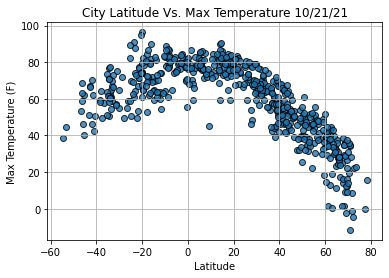

In [14]:
#import time module
import time

#build the scatter plot for the latitude vs. max temp
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidth=1, marker="o",
            alpha=.8, label="Cities")

#incorperate the other graph properties
plt.title(f"City Latitude Vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/fig1.png")

#show plot
plt.show()

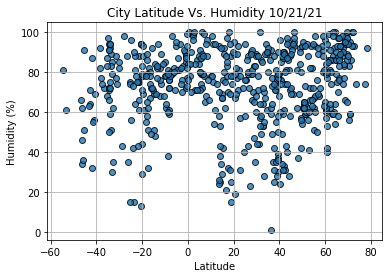

In [15]:
#6.3.2
#build the scatter plot for the latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidth=1, marker="o",
            alpha=.8, label="Cities")

#incorperate the other graph properties
plt.title(f"City Latitude Vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/fig2.png")

#show plot
plt.show()

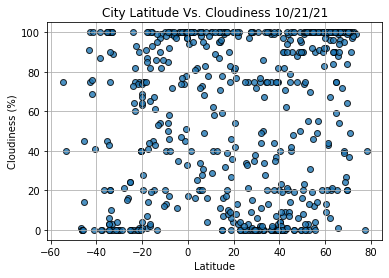

In [16]:
#6.3.3
#build the scatter plot for the latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidth=1, marker="o",
            alpha=.8, label="Cities")
plt.title(f"City Latitude Vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/fig3.png")
plt.show()

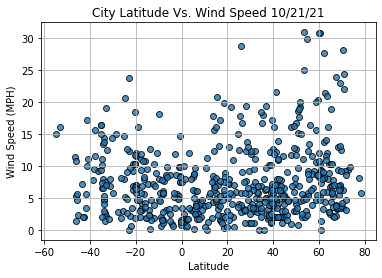

In [17]:
#6.3.4
#build the scatter plot for the latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidth=1, marker="o",
            alpha=.8, label="Cities")
plt.title(f"City Latitude Vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/fig4.png")
plt.show()

In [28]:
#6.4.2 linear regression
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# this is setting up the graphs to be displayed with some minor changes below
# so we use plot_linear_regression to access this setup
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"The R Value is {r_value}.")

In [19]:
# using loc to look at the 13th row, of a data frame
index13 = city_data_df.loc[13]
index13

City                  New Norfolk
Country                        AU
Date          2021-10-22 01:56:30
Lat                      -42.7826
Lng                      147.0587
Max Temp                    66.92
Humidity                       64
Cloudiness                    100
Wind Speed                   1.99
Name: 13, dtype: object

In [20]:
#this is filtering the latatude column of the data set that its greater than or equal to 0, so in the northern hemisphere
#returns as boolians, so not super helpful 
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
566     True
567     True
568     True
569    False
570     True
Name: Lat, Length: 571, dtype: bool

In [21]:
# this is using loc to return all of the data as a data frame
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2021-10-22 01:57:07,70.6333,147.9167,-11.58,95,49,3.47
2,San Patricio,US,2021-10-22 01:57:07,28.0170,-97.5169,78.89,66,15,7.61
4,Kodiak,US,2021-10-22 01:57:08,57.7900,-152.4072,37.99,72,100,9.24
6,Cockburn Town,TC,2021-10-22 01:57:08,21.4612,-71.1419,83.37,77,13,19.22
7,Albany,US,2021-10-22 01:56:22,42.6001,-73.9662,62.67,74,9,4.90
8,Meulaboh,ID,2021-10-22 01:57:09,4.1363,96.1285,78.84,86,82,3.06
10,Severo-Kurilsk,RU,2021-10-22 01:57:10,50.6789,156.1250,39.70,65,99,9.69
16,Pecos,US,2021-10-22 01:57:11,31.4229,-103.4932,76.30,57,1,6.91
18,Ponta Do Sol,PT,2021-10-22 01:57:12,32.6667,-17.1000,70.43,64,50,5.06
20,Kashi,CN,2021-10-22 01:57:13,39.4547,75.9797,56.41,30,75,6.71


In [22]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Rikitea,PF,2021-10-22 01:56:16,-23.1203,-134.9692,73.89,81,60,23.82
3,Viedma,AR,2021-10-22 01:57:07,-40.8135,-62.9967,50.40,69,41,11.14
5,Punta Arenas,CL,2021-10-22 01:52:22,-53.1500,-70.9167,44.71,61,40,16.11
9,Chibombo,ZM,2021-10-22 01:57:09,-14.6569,28.0706,64.65,69,20,7.14
11,East London,ZA,2021-10-22 01:57:10,-33.0153,27.9116,67.17,85,100,2.21
12,Te Anau,NZ,2021-10-22 01:56:26,-45.4167,167.7167,62.35,51,14,2.35
13,New Norfolk,AU,2021-10-22 01:56:30,-42.7826,147.0587,66.92,64,100,1.99
14,Rawson,AR,2021-10-22 01:57:11,-43.3002,-65.1023,51.06,63,91,7.16
15,Mataura,NZ,2021-10-22 01:56:16,-46.1927,168.8643,68.90,34,0,1.32
17,Hermanus,ZA,2021-10-22 01:56:33,-34.4187,19.2345,62.80,71,100,13.42


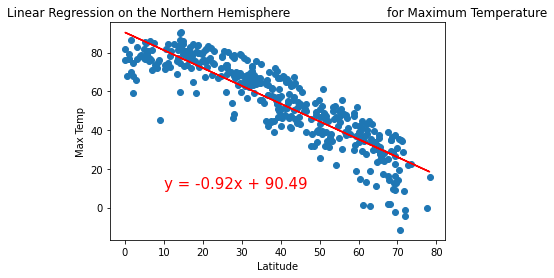

The R Value is -0.886861406745106.


In [29]:
# Linear regression on the Northern Hemisphere
#setting the x and y values to latetude and temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,10))

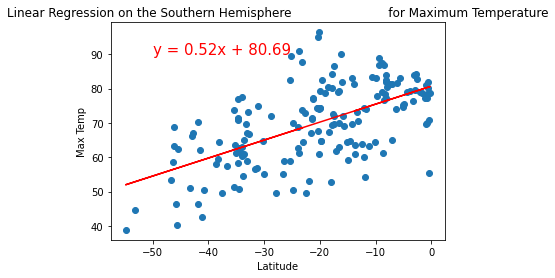

The R Value is 0.6046650046544968.


In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

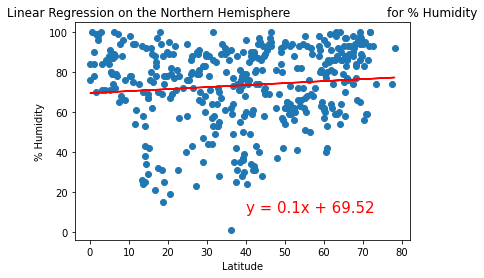

The R Value is 0.10371331141532489.


In [31]:
#6.4.3
# Linear regression on the Northern Hemisphere, humidity vs lat
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

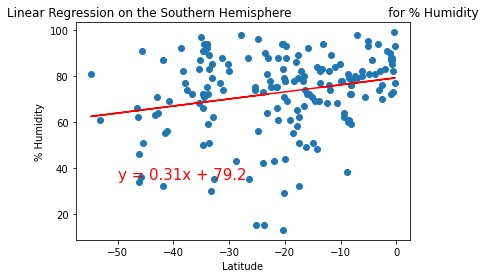

The R Value is 0.23099166407367286.


In [32]:
#6.4.3
# Linear regression on the Southern Hemisphere, humidity vs lat
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,35))

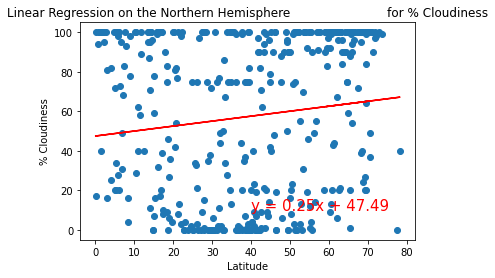

The R Value is 0.1265509713993674.


In [33]:
#6.4.4
# Linear regression on the Northern Hemisphere, cloudiness vs lat
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

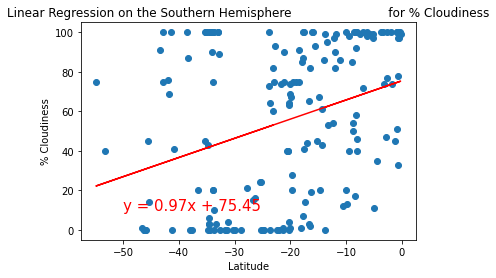

The R Value is 0.33181351457235525.


In [37]:
# Linear regression on the Southern Hemisphere, cloudiness vs lat
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,10))

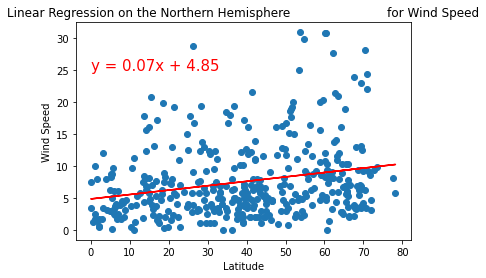

The R Value is 0.2394097335786199.


In [40]:
#6.4.5
# Linear regression on the Northern Hemisphere, wind speed vs lat
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,25))

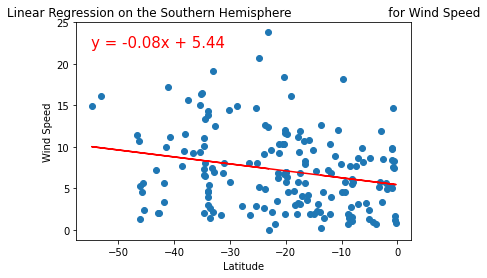

The R Value is -0.23509224466847337.


In [44]:
# Linear regression on the Southern Hemisphere, wind speed vs lat
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-55,22))